In [1]:
!pip install pyspark

In [2]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [3]:
sc = SparkSession.builder.appName("MovieReco").getOrCreate()

raw_data = sc.sparkContext.textFile("/content/InputData_1.txt")

Testing Input Data

In [4]:
raw_data.collect()

['1,10001,5.0',
 '1,10002,3.0',
 '1,10003,2.5',
 '2,10001,2.0',
 '2,10002,2.5',
 '2,10003,5.0',
 '2,10004,2.0',
 '3,10001,2.0',
 '3,10004,4.0',
 '3,10005,4.5',
 '3,10007,5.0',
 '4,10001,5.0',
 '4,10003,3.0',
 '4,10004,4.5',
 '4,10006,4.0',
 '5,10001,4.0',
 '5,10002,3.0',
 '5,10003,2.0',
 '5,10004,4.0',
 '5,10005,3.5',
 '5,10006,4.0']

Task 1 Map

In [5]:
mapped_rdd = raw_data.map(lambda line: line.split(",")) \
    .map(lambda record: (record[0], record[1] + ":" + record[2]))

# print the first 10 elements of the mapped RDD for verification
mapped_rdd.collect()

[('1', '10001:5.0'),
 ('1', '10002:3.0'),
 ('1', '10003:2.5'),
 ('2', '10001:2.0'),
 ('2', '10002:2.5'),
 ('2', '10003:5.0'),
 ('2', '10004:2.0'),
 ('3', '10001:2.0'),
 ('3', '10004:4.0'),
 ('3', '10005:4.5'),
 ('3', '10007:5.0'),
 ('4', '10001:5.0'),
 ('4', '10003:3.0'),
 ('4', '10004:4.5'),
 ('4', '10006:4.0'),
 ('5', '10001:4.0'),
 ('5', '10002:3.0'),
 ('5', '10003:2.0'),
 ('5', '10004:4.0'),
 ('5', '10005:3.5'),
 ('5', '10006:4.0')]

Task 1 Reduce

In [6]:
reduced_rdd = mapped_rdd.reduceByKey(lambda rating1, rating2: rating1 + "," + rating2)

# print the results for verification
for element in reduced_rdd.collect():
    print(element)

('3', '10001:2.0,10004:4.0,10005:4.5,10007:5.0')
('4', '10001:5.0,10003:3.0,10004:4.5,10006:4.0')
('5', '10001:4.0,10002:3.0,10003:2.0,10004:4.0,10005:3.5,10006:4.0')
('1', '10001:5.0,10002:3.0,10003:2.5')
('2', '10001:2.0,10002:2.5,10003:5.0,10004:2.0')


Task 2 Map

In [7]:
def map_pairs(user_ratings):
    pairs = []
    items = user_ratings.split(',')
    for i in range(len(items)):
        item_i = items[i].split(':')[0]
        for j in range(i+1, len(items)):
            item_j = items[j].split(':')[0]
            pairs.append((item_i + ':' + item_j, 1))
            pairs.append((item_j + ':' + item_i, 1))
    return pairs


pair_rdd = reduced_rdd.flatMap(lambda x: map_pairs(x[1]))

for element in pair_rdd.collect():
    print(element)

('10001:10004', 1)
('10004:10001', 1)
('10001:10005', 1)
('10005:10001', 1)
('10001:10007', 1)
('10007:10001', 1)
('10004:10005', 1)
('10005:10004', 1)
('10004:10007', 1)
('10007:10004', 1)
('10005:10007', 1)
('10007:10005', 1)
('10001:10003', 1)
('10003:10001', 1)
('10001:10004', 1)
('10004:10001', 1)
('10001:10006', 1)
('10006:10001', 1)
('10003:10004', 1)
('10004:10003', 1)
('10003:10006', 1)
('10006:10003', 1)
('10004:10006', 1)
('10006:10004', 1)
('10001:10002', 1)
('10002:10001', 1)
('10001:10003', 1)
('10003:10001', 1)
('10001:10004', 1)
('10004:10001', 1)
('10001:10005', 1)
('10005:10001', 1)
('10001:10006', 1)
('10006:10001', 1)
('10002:10003', 1)
('10003:10002', 1)
('10002:10004', 1)
('10004:10002', 1)
('10002:10005', 1)
('10005:10002', 1)
('10002:10006', 1)
('10006:10002', 1)
('10003:10004', 1)
('10004:10003', 1)
('10003:10005', 1)
('10005:10003', 1)
('10003:10006', 1)
('10006:10003', 1)
('10004:10005', 1)
('10005:10004', 1)
('10004:10006', 1)
('10006:10004', 1)
('10005:1000

Task 2 Reduce

In [8]:
def reducer(a, b):
    return a + b

co_occurrence_rdd = pair_rdd.reduceByKey(reducer)
co_occurrence_rdd.collect()

[('10005:10004', 2),
 ('10004:10007', 1),
 ('10007:10004', 1),
 ('10001:10003', 4),
 ('10006:10003', 2),
 ('10004:10006', 2),
 ('10001:10002', 3),
 ('10002:10003', 3),
 ('10004:10002', 2),
 ('10005:10002', 1),
 ('10002:10006', 1),
 ('10006:10002', 1),
 ('10001:10004', 4),
 ('10004:10001', 4),
 ('10001:10005', 2),
 ('10005:10001', 2),
 ('10001:10007', 1),
 ('10007:10001', 1),
 ('10004:10005', 2),
 ('10005:10007', 1),
 ('10007:10005', 1),
 ('10003:10001', 4),
 ('10001:10006', 2),
 ('10006:10001', 2),
 ('10003:10004', 3),
 ('10004:10003', 3),
 ('10003:10006', 2),
 ('10006:10004', 2),
 ('10002:10001', 3),
 ('10003:10002', 3),
 ('10002:10004', 2),
 ('10002:10005', 1),
 ('10003:10005', 1),
 ('10005:10003', 1),
 ('10005:10006', 1),
 ('10006:10005', 1)]

Task 3 Map

In [9]:
def mapper(record):
    movie_pair, count = record
    movie_idi, movie_idj = movie_pair.split(':')
    return (movie_idi, f"{movie_idj}:{count}")

mapped_rdd = co_occurrence_rdd.map(mapper)

mapped_rdd.collect()

[('10005', '10004:2'),
 ('10004', '10007:1'),
 ('10007', '10004:1'),
 ('10001', '10003:4'),
 ('10006', '10003:2'),
 ('10004', '10006:2'),
 ('10001', '10002:3'),
 ('10002', '10003:3'),
 ('10004', '10002:2'),
 ('10005', '10002:1'),
 ('10002', '10006:1'),
 ('10006', '10002:1'),
 ('10001', '10004:4'),
 ('10004', '10001:4'),
 ('10001', '10005:2'),
 ('10005', '10001:2'),
 ('10001', '10007:1'),
 ('10007', '10001:1'),
 ('10004', '10005:2'),
 ('10005', '10007:1'),
 ('10007', '10005:1'),
 ('10003', '10001:4'),
 ('10001', '10006:2'),
 ('10006', '10001:2'),
 ('10003', '10004:3'),
 ('10004', '10003:3'),
 ('10003', '10006:2'),
 ('10006', '10004:2'),
 ('10002', '10001:3'),
 ('10003', '10002:3'),
 ('10002', '10004:2'),
 ('10002', '10005:1'),
 ('10003', '10005:1'),
 ('10005', '10003:1'),
 ('10005', '10006:1'),
 ('10006', '10005:1')]

Task 3 making changes to the input for reduce

In [10]:
# Step 1: Extract movieIdi and movieIdj:count pairs
pair_rdd = mapped_rdd.map(lambda x: (x[0], x[1].split(':'))) \
                    .mapValues(lambda x: [(x[i], int(x[i + 1])) for i in range(0, len(x), 2)])

# Step 2: Combine counts for each movieIdi
combined_rdd = pair_rdd.reduceByKey(lambda x, y: x + y)

# Step 3: Format the output
new_rdd = combined_rdd.map(lambda x: (x[0], tuple(x[1])))

# Print the new RDD
new_rdd.collect()

[('10005',
  (('10004', 2),
   ('10002', 1),
   ('10001', 2),
   ('10007', 1),
   ('10003', 1),
   ('10006', 1))),
 ('10006',
  (('10003', 2), ('10002', 1), ('10001', 2), ('10004', 2), ('10005', 1))),
 ('10003',
  (('10001', 4), ('10004', 3), ('10006', 2), ('10002', 3), ('10005', 1))),
 ('10004',
  (('10007', 1),
   ('10006', 2),
   ('10002', 2),
   ('10001', 4),
   ('10005', 2),
   ('10003', 3))),
 ('10007', (('10004', 1), ('10001', 1), ('10005', 1))),
 ('10001',
  (('10003', 4),
   ('10002', 3),
   ('10004', 4),
   ('10005', 2),
   ('10007', 1),
   ('10006', 2))),
 ('10002',
  (('10003', 3), ('10006', 1), ('10001', 3), ('10004', 2), ('10005', 1)))]

Task 3 Reduce

In [11]:
# Step 1: Calculate the total count for each movieIdj
total_counts_rdd = new_rdd.flatMap(lambda x: [(item[0], item[1]) for item in x[1]]) \
                          .reduceByKey(lambda x, y: x + y)

# Step 2: Calculate movieIdi=countj/totalCount for each movieIdj
reduc_rdd3 = new_rdd.flatMap(lambda x: [(item[0], (x[0], item[1])) for item in x[1]]) \
                    .join(total_counts_rdd) \
                    .map(lambda x: (x[1][0][0], x[0] + "=" + str(x[1][0][1] / x[1][1])))

# Print the reduc_rdd3
reduc_rdd3.collect()

[('10005', '10004=0.14285714285714285'),
 ('10006', '10004=0.14285714285714285'),
 ('10003', '10004=0.21428571428571427'),
 ('10007', '10004=0.07142857142857142'),
 ('10001', '10004=0.2857142857142857'),
 ('10002', '10004=0.14285714285714285'),
 ('10005', '10002=0.1'),
 ('10006', '10002=0.1'),
 ('10003', '10002=0.3'),
 ('10004', '10002=0.2'),
 ('10001', '10002=0.3'),
 ('10005', '10007=0.3333333333333333'),
 ('10004', '10007=0.3333333333333333'),
 ('10001', '10007=0.3333333333333333'),
 ('10005', '10003=0.07692307692307693'),
 ('10006', '10003=0.15384615384615385'),
 ('10004', '10003=0.23076923076923078'),
 ('10001', '10003=0.3076923076923077'),
 ('10002', '10003=0.23076923076923078'),
 ('10005', '10006=0.125'),
 ('10003', '10006=0.25'),
 ('10004', '10006=0.25'),
 ('10001', '10006=0.25'),
 ('10002', '10006=0.125'),
 ('10006', '10005=0.125'),
 ('10003', '10005=0.125'),
 ('10004', '10005=0.25'),
 ('10007', '10005=0.125'),
 ('10001', '10005=0.25'),
 ('10002', '10005=0.125'),
 ('10005', '10

Task 4 Map

In [12]:
# Step 1: Map the raw_data RDD to the desired format
map_rdd4 = raw_data.map(lambda x: (x.split(',')[0], float(x.split(',')[2])))

# Print the map_rdd4
for item in map_rdd4.collect():
    print(item)

('1', 5.0)
('1', 3.0)
('1', 2.5)
('2', 2.0)
('2', 2.5)
('2', 5.0)
('2', 2.0)
('3', 2.0)
('3', 4.0)
('3', 4.5)
('3', 5.0)
('4', 5.0)
('4', 3.0)
('4', 4.5)
('4', 4.0)
('5', 4.0)
('5', 3.0)
('5', 2.0)
('5', 4.0)
('5', 3.5)
('5', 4.0)


Making rdd that is suitable for input of Reduce for task 4

In [13]:
#Input for Reduce 4

# Step 1: Combine ratings for each userId
intermediate_4 = map_rdd4.groupByKey()

# Assuming you have an existing SparkSession named 'spark'
# and 'intermediate_4' contains the RDD with the format userId, (rating1, rating2, ...)

# Step 1: Convert ResultIterable to list of ratings for each userId
intermediate_4 = intermediate_4.mapValues(list)

# Print the intermediate_4
for item in intermediate_4.collect():
    print(item)

('3', [2.0, 4.0, 4.5, 5.0])
('4', [5.0, 3.0, 4.5, 4.0])
('5', [4.0, 3.0, 2.0, 4.0, 3.5, 4.0])
('1', [5.0, 3.0, 2.5])
('2', [2.0, 2.5, 5.0, 2.0])


Reduce for Task 4

In [14]:
# Step 1: Calculate the average rating for each userId
reduce_rdd4 = intermediate_4.map(lambda x: (x[0], sum(x[1]) / len(x[1])))

# Print the reduce_rdd4
for item in reduce_rdd4.collect():
    print(item)

('3', 3.875)
('4', 4.125)
('5', 3.4166666666666665)
('1', 3.5)
('2', 2.875)


Task 5 Map 1 is an rdd that we already made before so we use that directly

Task 5 Map2

In [15]:
# 'raw_rdd' contains the RDD with the format userId,movieId,rating

# Step 1: Map the input to the desired format
map_rdd5 = raw_data.map(lambda x: (x.split(',')[1], x.split(',')[0] + ':' + x.split(',')[2]))

# Print the map_rdd5
map_rdd5.collect()

[('10001', '1:5.0'),
 ('10002', '1:3.0'),
 ('10003', '1:2.5'),
 ('10001', '2:2.0'),
 ('10002', '2:2.5'),
 ('10003', '2:5.0'),
 ('10004', '2:2.0'),
 ('10001', '3:2.0'),
 ('10004', '3:4.0'),
 ('10005', '3:4.5'),
 ('10007', '3:5.0'),
 ('10001', '4:5.0'),
 ('10003', '4:3.0'),
 ('10004', '4:4.5'),
 ('10006', '4:4.0'),
 ('10001', '5:4.0'),
 ('10002', '5:3.0'),
 ('10003', '5:2.0'),
 ('10004', '5:4.0'),
 ('10005', '5:3.5'),
 ('10006', '5:4.0')]

Intermediate for Task 5 creating reduc_rdd5 input

In [16]:
# and 'reduc_rdd3' contains the RDD with the format (movieidk1, movieid1=weighti1, movieidk2, movieid2=weighti2, ...)
# and 'map_rdd5' contains the RDD with the format movieId, userId:rating

# Step 1: Transform reduc_rdd3 into a key-value pair RDD with movieIdk as the key
reduc_rdd3_kv = reduc_rdd3.map(lambda x: (x[0], x[1]))

# Step 2: Join reduc_rdd3_kv with map_rdd5 based on movieId
intermediate_5 = reduc_rdd3_kv.join(map_rdd5)

# Print the intermediate_5
for item in intermediate_5.collect():
    print(item)


('10007', ('10004=0.07142857142857142', '3:5.0'))
('10007', ('10005=0.125', '3:5.0'))
('10007', ('10001=0.0625', '3:5.0'))
('10001', ('10004=0.2857142857142857', '1:5.0'))
('10001', ('10004=0.2857142857142857', '2:2.0'))
('10001', ('10004=0.2857142857142857', '3:2.0'))
('10001', ('10004=0.2857142857142857', '4:5.0'))
('10001', ('10004=0.2857142857142857', '5:4.0'))
('10001', ('10002=0.3', '1:5.0'))
('10001', ('10002=0.3', '2:2.0'))
('10001', ('10002=0.3', '3:2.0'))
('10001', ('10002=0.3', '4:5.0'))
('10001', ('10002=0.3', '5:4.0'))
('10001', ('10007=0.3333333333333333', '1:5.0'))
('10001', ('10007=0.3333333333333333', '2:2.0'))
('10001', ('10007=0.3333333333333333', '3:2.0'))
('10001', ('10007=0.3333333333333333', '4:5.0'))
('10001', ('10007=0.3333333333333333', '5:4.0'))
('10001', ('10003=0.3076923076923077', '1:5.0'))
('10001', ('10003=0.3076923076923077', '2:2.0'))
('10001', ('10003=0.3076923076923077', '3:2.0'))
('10001', ('10003=0.3076923076923077', '4:5.0'))
('10001', ('10003=0.3

In [17]:
combined_rows = intermediate_5.reduceByKey(lambda x, y: x if y in x else x + y)

# Print the combined rows
for row in combined_rows.collect():
    print(row)

('10007', ('10004=0.07142857142857142', '3:5.0', '10005=0.125', '3:5.0', '10001=0.0625', '3:5.0'))
('10001', ('10004=0.2857142857142857', '1:5.0', '10004=0.2857142857142857', '2:2.0', '10004=0.2857142857142857', '3:2.0', '10004=0.2857142857142857', '4:5.0', '10004=0.2857142857142857', '5:4.0', '10002=0.3', '1:5.0', '10002=0.3', '2:2.0', '10002=0.3', '3:2.0', '10002=0.3', '4:5.0', '10002=0.3', '5:4.0', '10007=0.3333333333333333', '1:5.0', '10007=0.3333333333333333', '2:2.0', '10007=0.3333333333333333', '3:2.0', '10007=0.3333333333333333', '4:5.0', '10007=0.3333333333333333', '5:4.0', '10003=0.3076923076923077', '1:5.0', '10003=0.3076923076923077', '2:2.0', '10003=0.3076923076923077', '3:2.0', '10003=0.3076923076923077', '4:5.0', '10003=0.3076923076923077', '5:4.0', '10006=0.25', '1:5.0', '10006=0.25', '2:2.0', '10006=0.25', '3:2.0', '10006=0.25', '4:5.0', '10006=0.25', '5:4.0', '10005=0.25', '1:5.0', '10005=0.25', '2:2.0', '10005=0.25', '3:2.0', '10005=0.25', '4:5.0', '10005=0.25', '5:4

In [18]:
red5_input = combined_rows.mapValues(lambda x: tuple(set(x)))
for row in red5_input.collect():
    print(row)

('10007', ('10004=0.07142857142857142', '10001=0.0625', '10005=0.125', '3:5.0'))
('10001', ('3:2.0', '10006=0.25', '4:5.0', '5:4.0', '1:5.0', '10007=0.3333333333333333', '10005=0.25', '10002=0.3', '10003=0.3076923076923077', '2:2.0', '10004=0.2857142857142857'))
('10006', ('4:4.0', '5:4.0', '10002=0.1', '10004=0.14285714285714285', '10003=0.15384615384615385', '10001=0.125', '10005=0.125'))
('10005', ('3:4.5', '5:3.5', '10007=0.3333333333333333', '10002=0.1', '10004=0.14285714285714285', '10001=0.125', '10003=0.07692307692307693', '10006=0.125'))
('10003', ('2:5.0', '10006=0.25', '4:3.0', '10001=0.25', '10005=0.125', '10002=0.3', '10004=0.21428571428571427', '5:2.0', '1:2.5'))
('10002', ('5:3.0', '1:3.0', '10001=0.1875', '10004=0.14285714285714285', '10003=0.23076923076923078', '2:2.5', '10005=0.125', '10006=0.125'))
('10004', ('10006=0.25', '5:4.0', '10001=0.25', '10007=0.3333333333333333', '10005=0.25', '10003=0.23076923076923078', '10002=0.2', '4:4.5', '3:4.0', '2:2.0'))


In [19]:
red5_input2 = red5_input.mapValues(lambda x: tuple(sorted(x, key=lambda v: v if '=' in v else '', reverse=True)))

for row in red5_input2.collect():
    print(row)

('10007', ('10005=0.125', '10004=0.07142857142857142', '10001=0.0625', '3:5.0'))
('10001', ('10007=0.3333333333333333', '10006=0.25', '10005=0.25', '10004=0.2857142857142857', '10003=0.3076923076923077', '10002=0.3', '3:2.0', '4:5.0', '5:4.0', '1:5.0', '2:2.0'))
('10006', ('10005=0.125', '10004=0.14285714285714285', '10003=0.15384615384615385', '10002=0.1', '10001=0.125', '4:4.0', '5:4.0'))
('10005', ('10007=0.3333333333333333', '10006=0.125', '10004=0.14285714285714285', '10003=0.07692307692307693', '10002=0.1', '10001=0.125', '3:4.5', '5:3.5'))
('10003', ('10006=0.25', '10005=0.125', '10004=0.21428571428571427', '10002=0.3', '10001=0.25', '2:5.0', '4:3.0', '5:2.0', '1:2.5'))
('10002', ('10006=0.125', '10005=0.125', '10004=0.14285714285714285', '10003=0.23076923076923078', '10001=0.1875', '5:3.0', '1:3.0', '2:2.5'))
('10004', ('10007=0.3333333333333333', '10006=0.25', '10005=0.25', '10003=0.23076923076923078', '10002=0.2', '10001=0.25', '5:4.0', '4:4.5', '3:4.0', '2:2.0'))


Reduce for Task 5

In [20]:
reduced_rdd5 = intermediate_5.flatMap(lambda x: [(f"{r.split(':')[0]}:{m.split('=')[0]}", float(m.split('=')[1]) * float(r.split(':')[1])) for m in x[1] if '=' in m for r in x[1] if ':' in r])

for x in reduced_rdd5.collect():
  print(x)

('3:10004', 0.3571428571428571)
('3:10005', 0.625)
('3:10001', 0.3125)
('1:10004', 1.4285714285714284)
('2:10004', 0.5714285714285714)
('3:10004', 0.5714285714285714)
('4:10004', 1.4285714285714284)
('5:10004', 1.1428571428571428)
('1:10002', 1.5)
('2:10002', 0.6)
('3:10002', 0.6)
('4:10002', 1.5)
('5:10002', 1.2)
('1:10007', 1.6666666666666665)
('2:10007', 0.6666666666666666)
('3:10007', 0.6666666666666666)
('4:10007', 1.6666666666666665)
('5:10007', 1.3333333333333333)
('1:10003', 1.5384615384615385)
('2:10003', 0.6153846153846154)
('3:10003', 0.6153846153846154)
('4:10003', 1.5384615384615385)
('5:10003', 1.2307692307692308)
('1:10006', 1.25)
('2:10006', 0.5)
('3:10006', 0.5)
('4:10006', 1.25)
('5:10006', 1.0)
('1:10005', 1.25)
('2:10005', 0.5)
('3:10005', 0.5)
('4:10005', 1.25)
('5:10005', 1.0)
('4:10004', 0.5714285714285714)
('5:10004', 0.5714285714285714)
('4:10002', 0.4)
('5:10002', 0.4)
('4:10003', 0.6153846153846154)
('5:10003', 0.6153846153846154)
('4:10005', 0.5)
('5:10005',

Map for Task 6 is an rdd we already have

Following is the reduce for Task 6

In [21]:
result_rdd = reduced_rdd5.reduceByKey(lambda a, b: a + b)

result_rdd.collect()

[('4:10004', 2.6428571428571423),
 ('3:10002', 1.85),
 ('4:10007', 3.1666666666666665),
 ('2:10003', 1.653846153846154),
 ('3:10006', 2.0625),
 ('1:10005', 1.9375),
 ('5:10002', 3.3499999999999996),
 ('3:10003', 1.8846153846153846),
 ('4:10006', 3.125),
 ('2:10005', 1.9375),
 ('5:10005', 3.125),
 ('2:10001', 2.21875),
 ('1:10004', 2.3928571428571423),
 ('2:10004', 2.0),
 ('2:10007', 1.3333333333333333),
 ('3:10007', 3.5),
 ('4:10001', 2.375),
 ('3:10005', 2.125),
 ('1:10002', 2.25),
 ('2:10002', 2.5),
 ('4:10002', 3.6999999999999997),
 ('2:10006', 2.5625),
 ('5:10006', 3.3125),
 ('1:10007', 1.6666666666666665),
 ('1:10003', 2.230769230769231),
 ('4:10003', 3.1923076923076925),
 ('3:10004', 1.5714285714285712),
 ('3:10001', 1.875),
 ('5:10004', 3.071428571428571),
 ('5:10007', 3.833333333333333),
 ('5:10003', 3.730769230769231),
 ('1:10006', 2.25),
 ('4:10005', 3.25),
 ('5:10001', 3.0),
 ('1:10001', 1.1875)]

RMSE: 0.30


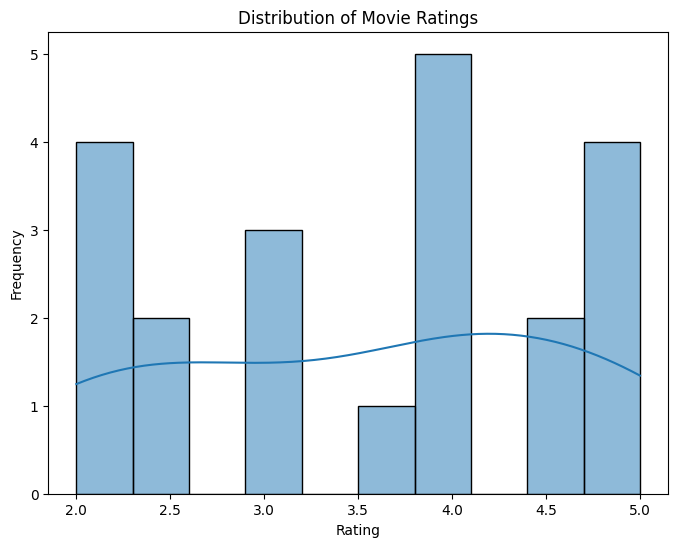

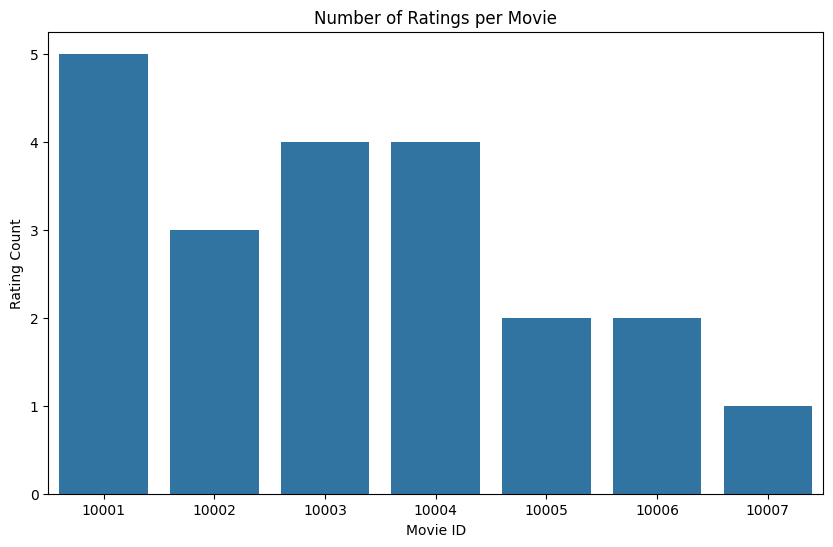

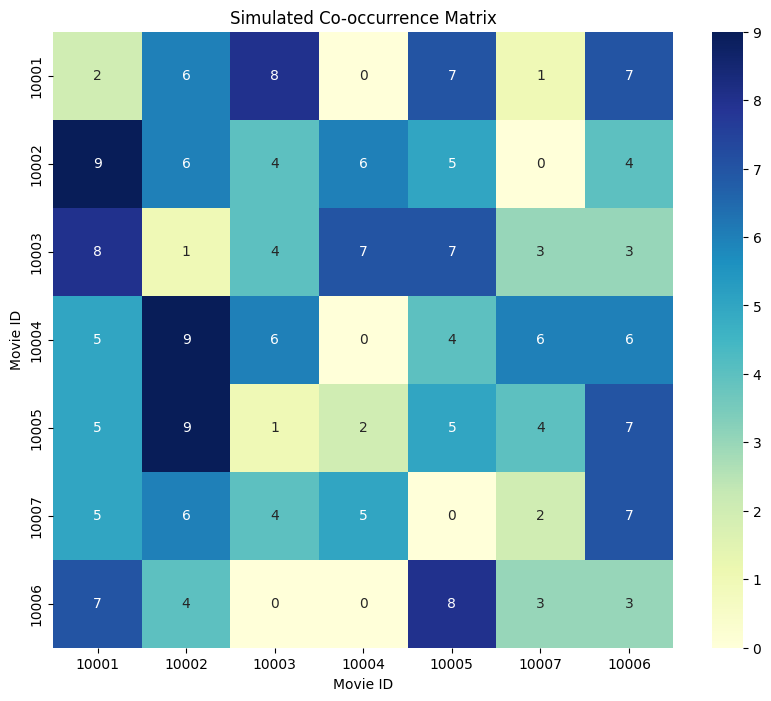

In [27]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

df = sc.read.csv("InputData_1.txt", inferSchema=True, header=False)
df = df.toDF("userId", "movieId", "rating")

df = df.withColumn("predicted", F.col("rating") + (F.rand() - 0.5))

# Calculate the squared error and then RMSE in Spark
df = df.withColumn("squared_error", (F.col("rating") - F.col("predicted")) ** 2)
rmse = df.agg(F.sqrt(F.avg("squared_error")).alias("rmse")).collect()[0]["rmse"]
print(f"RMSE: {rmse:.2f}")

# --- Converting Data for Visualization ---

# Convert the Spark DataFrame to a Pandas DataFrame for visualization
pdf = df.toPandas()

# --- Visualizations ---

# 1. Histogram of Movie Ratings
plt.figure(figsize=(8, 6))
sns.histplot(pdf["rating"], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 2. Bar Chart: Number of Ratings per Movie
rating_counts = pdf.groupby("movieId").size().reset_index(name="count")
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_counts, x="movieId", y="count")
plt.title("Number of Ratings per Movie")
plt.xlabel("Movie ID")
plt.ylabel("Rating Count")
plt.show()

# 3. Heatmap: Simulated Co-occurrence Matrix
# In your project, you would compute the actual co-occurrence matrix.
# Here, we simulate one for demonstration.
unique_movies = pdf["movieId"].unique()
co_occurrence = np.random.randint(0, 10, size=(len(unique_movies), len(unique_movies)))

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt="d",
            xticklabels=unique_movies, yticklabels=unique_movies, cmap="YlGnBu")
plt.title("Simulated Co-occurrence Matrix")
plt.xlabel("Movie ID")
plt.ylabel("Movie ID")
plt.show()